**Partial Depdendence Plots**

This is a way of examining the impact of one variable at a time on a model

The example below is from the manual for scikitlearn

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.neural_network import MLPRegressor

This example from scikit learn makes use of one of scikit learns example data set,  a model called the frideman1 data set

The x values (x1,x2,x3,x4,x5,x6...) are used to create y.

Each x values is randomly and uniformly distributed over the range (0,1)


y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).

Only the first 5 features in x are use, more features can be added.

The default is x0 to x9

The object clf is a predictor fitted to the data

In [55]:
X, y = make_friedman1()
##clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)

clf= MLPRegressor(hidden_layer_sizes=(10,10,5,),solver='adam',activation='relu', max_iter=50000,learning_rate='invscaling',random_state=0).fit(X,y)

In [31]:
X.shape

(100, 10)

In [32]:
y.shape

(100,)

(array([ 5.,  3., 19., 15., 13., 12., 17.,  7.,  5.,  4.]),
 array([ 3.04013591,  5.42479072,  7.80944554, 10.19410036, 12.57875517,
        14.96340999, 17.34806481, 19.73271962, 22.11737444, 24.50202925,
        26.88668407]),
 <BarContainer object of 10 artists>)

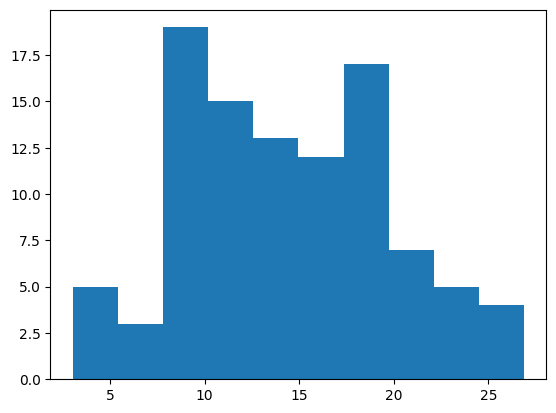

In [53]:
plt.hist(y)


We want to create a partial dependence plot, showing how each x value influences the answer.

We first work with one target variable at a time,  and create a list of "decile" values of num_steps in the range 0 to 1

the features list specifies we want the partial dependence of y on x[target], so we can look at each feature as desired

The cell below sets up the list of feature names, the target, the number of steps and the decile

In [72]:
target=0

num_steps=20

features=[(target,)]
feature_names = [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=num_steps)}




Now compute the partial dependence of the output (y) on the desired preditor variable X[target]

This is done by running the model for each input X vector, but replacing the X[target] value by the range of values in decile, and then averaging over them.

Note that in the partial_dependence() calculation, we could specify "average", "individual" or "both"

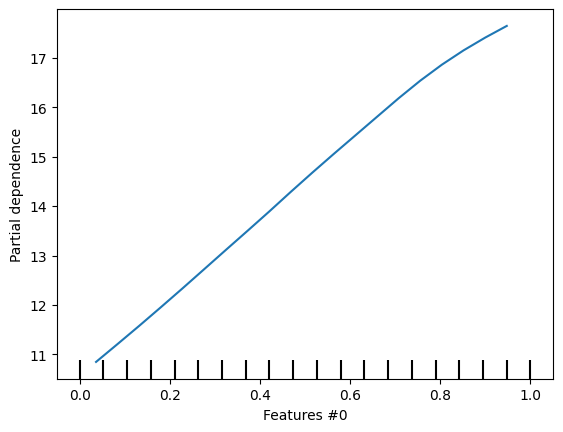

In [73]:
pd_results = partial_dependence(
    clf, X, features=target, kind="average", grid_resolution=num_steps)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot()
plt.show()

# Change the target number a bit, and see which variables seem to have substantial effects on the model

Discuss your results here

We should be able to use ELI5 to see which variables are most important

In [67]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=cfe8f576514c35ac12dbc4bf88583caa9e2098aea14ffb8a7b1713ff2ec8ca29
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [68]:
import eli5
from eli5.sklearn import PermutationImportance

In [69]:
perm = PermutationImportance(clf, random_state=1).fit(X, y)

In [71]:
eli5.show_weights(perm, feature_names = feature_names)

Weight,Feature
0.9589 ± 0.2962,Features #3
0.6636 ± 0.1839,Features #0
0.4208 ± 0.0701,Features #1
0.2978 ± 0.1674,Features #4
0.1729 ± 0.0151,Features #7
0.1622 ± 0.0817,Features #8
0.1619 ± 0.0561,Features #2
0.1548 ± 0.0266,Features #9
0.1217 ± 0.0532,Features #6
0.0439 ± 0.0196,Features #5


# Looking at the interaction of two predictor variables

We can plot a false color map that shows for two different predictors (one along the x-axis and one along the y-axis) what the predicted y value will be,  plotted as a false color "height" or contour

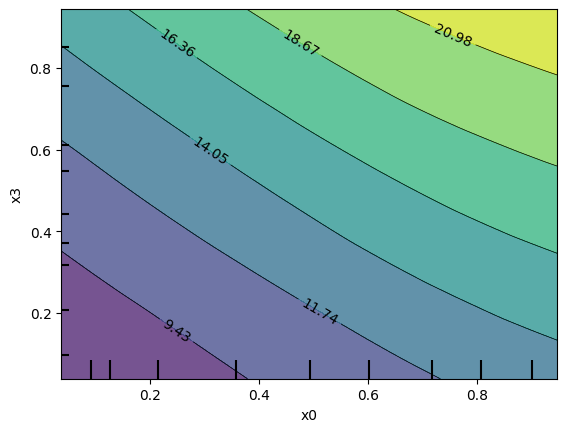

In [76]:

PartialDependenceDisplay.from_estimator(clf, X, [(0, 3)])
plt.show()

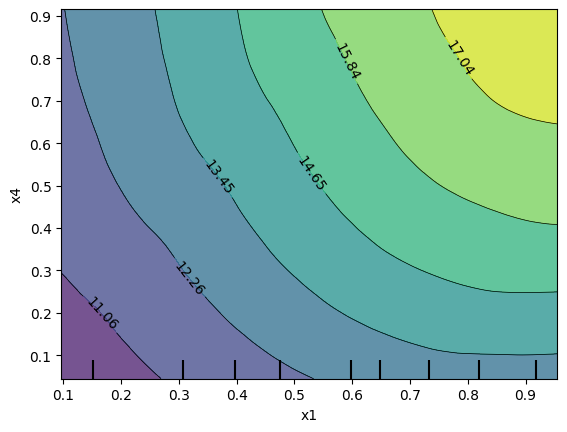

In [77]:
PartialDependenceDisplay.from_estimator(clf, X, [(1, 4)])
plt.show()

In [ ]:
X.shape

(100, 10)

In [ ]:
feature_names

['Features #0',
 'Features #1',
 'Features #2',
 'Features #3',
 'Features #4',
 'Features #5',
 'Features #6',
 'Features #7',
 'Features #8',
 'Features #9']